From the discussion on [Central limit theorem by Grant Sanderson on youtube](https://youtu.be/DjLL06dnDCY?feature=shared&t=1400)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from clt import Events

%matplotlib inline

Let's simulate a coin toss. One outcome, we move 1 step forward. Another outcome, we move 1 step backward. This is essentially a Monte Carlo simulation

In [11]:
n_rounds = 10_000
n_steps = 10_000

In [12]:
coin_toss = Events(weights= [1,1])
coin_toss.simulate(rounds = n_rounds, steps = n_steps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:16<00:00, 131.16it/s]


Doing the same for a different underlying probability distribution where from picking a ball from a group of 10 white and 1 back balls, we move forward 1 step if we pick a white balls. But if we choose a black ball, we mobe back 1 step

In [13]:
# 10 white and 1 black marbles
pick_balls = Events(weights = [10,1])
pick_balls.simulate(rounds = n_rounds, steps = n_steps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:13<00:00, 136.26it/s]


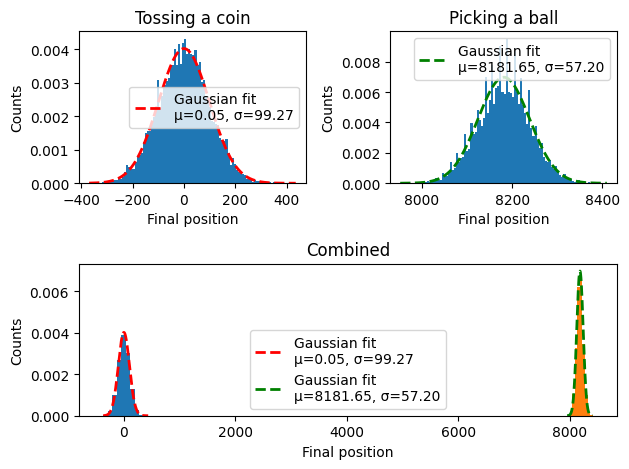

In [14]:
# https://stackoverflow.com/a/55848780/27171126
fig = plt.figure()

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,:])

x1, y1, mu1, sigma1 = coin_toss.gaussian_fit
ax1.plot(x1, y1, 'r--', lw=2, label=f'Gaussian fit\nμ={mu1:.2f}, σ={sigma1:.2f}')
ax1.hist(coin_toss.result, bins = 100, density = True)
ax1.set_title("Tossing a coin")
ax1.set_xlabel("Final position")
ax1.set_ylabel("Counts")
ax1.legend()

x2, y2, mu2, sigma2 = pick_balls.gaussian_fit
ax2.plot(x2, y2, 'g--', lw=2, label=f'Gaussian fit\nμ={mu2:.2f}, σ={sigma2:.2f}')
ax2.hist(pick_balls.result, bins = 100, density = True)
ax2.set_title("Picking a ball")
ax2.set_xlabel("Final position")
ax2.set_ylabel("Counts")
ax2.legend()

ax3.plot(x1, y1, 'r--', lw=2, label=f'Gaussian fit\nμ={mu1:.2f}, σ={sigma1:.2f}')
ax3.plot(x2, y2, 'g--', lw=2, label=f'Gaussian fit\nμ={mu2:.2f}, σ={sigma2:.2f}')
ax3.hist(coin_toss.result, density = True)
ax3.hist(pick_balls.result, density = True)
ax3.set_title("Combined")
ax3.set_xlabel("Final position")
ax3.set_ylabel("Counts")

plt.legend()
plt.tight_layout()
plt.show()

Now, what if we play around with the relative step size of the forward and backward step

In [15]:
coin_toss_2 = Events(
    weights = [1,1],
    forward_step = 100,
    backward_step = 1
)
coin_toss_2.simulate(rounds = n_rounds, steps = n_steps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:15<00:00, 133.20it/s]


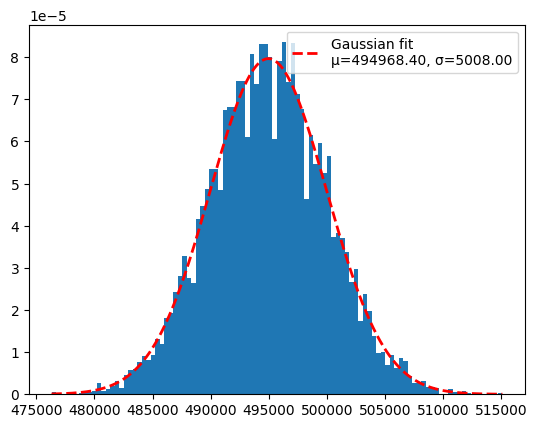

In [16]:
x, y, mu, sigma = coin_toss_2.gaussian_fit
plt.hist(coin_toss_2.result, bins = 100, density = True)
plt.plot(x, y, 'r--', lw=2, label=f'Gaussian fit\nμ={mu:.2f}, σ={sigma:.2f}')
plt.legend()
plt.show()

This is interesting. Though the relative step sizes were different, the distribution is still normal. Deformed normal distributions such as the one with a fat tail are obtained only when the step sizes are different relative to each other in the same round. 

For example, if the the step distance at a point x if defined as $|x|$, then there is a difference in how the normal distribution is distorted.